### Imports

In [1]:
from libs.feature_eng import preprocess
from libs.utils import fit_and_evaluate_multiple, load_model_from_json, plot_roc_curves, fit_and_save_predictions
from libs.dataloader import load_and_split_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

### Preprocess the train dataset

In [2]:
preprocess(path_in="data/training_data_fall2024.csv",
           path_out="data/",
           name_out="training_data_preprocessed.csv")

### Run and evaluate models

Evaluating LogisticRegression
Accuracy: 0.8688
Precision: 0.6538
Recall: 0.5862
F1: 0.6182
ROC AUC: 0.9025
Confusion Matrix: 
[[244  18]
 [ 24  34]]

Evaluating KNeighborsClassifier
Accuracy: 0.8656
Precision: 0.6531
Recall: 0.5517
F1: 0.5981
ROC AUC: 0.9053
Confusion Matrix: 
[[245  17]
 [ 26  32]]

Evaluating RandomForestClassifier
Accuracy: 0.8812
Precision: 0.6852
Recall: 0.6379
F1: 0.6607
ROC AUC: 0.9170
Confusion Matrix: 
[[245  17]
 [ 21  37]]

Evaluating XGBClassifier
Accuracy: 0.8656
Precision: 0.6415
Recall: 0.5862
F1: 0.6126
ROC AUC: 0.9197
Confusion Matrix: 
[[243  19]
 [ 24  34]]

Evaluating CatBoostClassifier
Accuracy: 0.8781
Precision: 0.7021
Recall: 0.5690
F1: 0.6286
ROC AUC: 0.9247
Confusion Matrix: 
[[248  14]
 [ 25  33]]

Evaluating DummyClassifier
Accuracy: 0.8187
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
ROC AUC: 0.5000
Confusion Matrix: 
[[262   0]
 [ 58   0]]



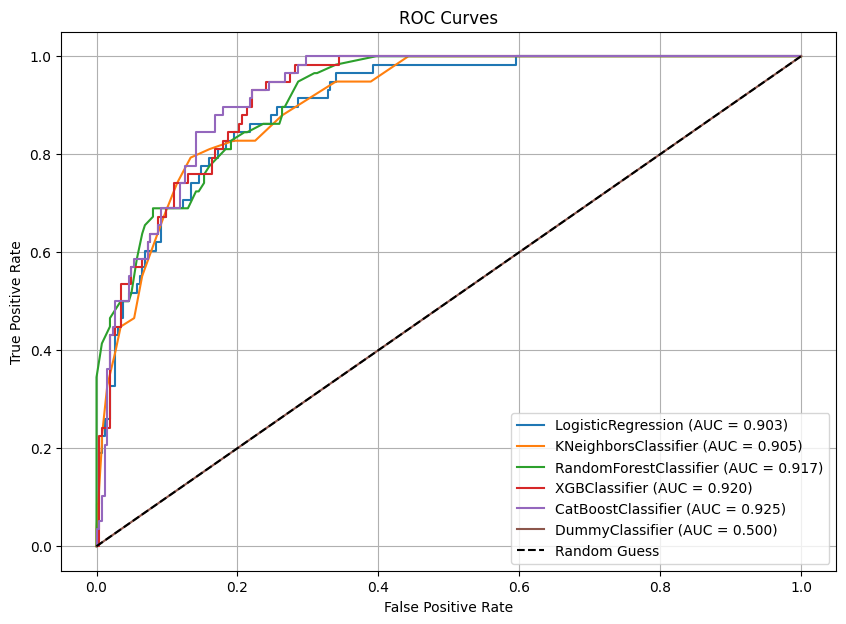

In [3]:
# Load models from json files with optimal hyperparameters
log_reg = load_model_from_json(LogisticRegression, 'output/best_params/logreg_best_params.json')
knn = load_model_from_json(KNeighborsClassifier, 'output/best_params/knn_best_params.json')
rf = load_model_from_json(RandomForestClassifier, 'output/best_params/rf_best_params.json')
xgb = load_model_from_json(XGBClassifier, 'output/best_params/xgb_best_params.json')
cb = load_model_from_json(CatBoostClassifier, 'output/best_params/catboost_best_params.json')
naive = DummyClassifier(strategy='most_frequent', random_state=0)


models = [log_reg, knn, rf, xgb, cb, naive]

# Load data
X_train, X_test, y_train, y_test = load_and_split_data("data/training_data_preprocessed.csv", 
                                                       target_column='increase_stock', 
                                                       class_zero='low_bike_demand', 
                                                       test_size=0.2, 
                                                       random_state=0)


# Evaluate all models, and plot ROC curves
results = fit_and_evaluate_multiple(models, 
                                    X_train, 
                                    y_train, 
                                    X_test, 
                                    y_test, 
                                    verbose=True)

plot_roc_curves(results)


## Compute definitive predictions for an unseen evaluation set

### Preprocess the evaluation dataset

In [4]:
preprocess(path_in="data/test_data_fall2024.csv",
           path_out="data/",
           name_out="test_data_preprocessed.csv")

### Compute and save predictions for the evaluation dataset

In [5]:
# Load random forest model from json file with optimal hyperparameters
rf = load_model_from_json(RandomForestClassifier, 'output/best_params/rf_best_params.json')

fit_and_save_predictions(model=rf,
                         training_data="data/training_data_preprocessed.csv",
                         X_eval="data/test_data_preprocessed.csv",
                         target_column="increase_stock",
                         class_zero='low_bike_demand')